# Descriptive Statistics of the First 100,000 Rows of the Dataset


In [1]:
import pandas as pd
from main import preprocess_df

df = pd.read_csv(
    "./datasets/lc_data_2007_to_2018.csv",
    low_memory=False,
    encoding="latin1",
    nrows=100000,  # only looking at 10k rows right now for performance
)
pd.set_option("display.max_columns", None)
cleaned_df = preprocess_df(df)

In [2]:
import numpy as np
from pprint import pprint
from rich import print as rprint
from rich.table import Table
from rich.console import Console

relevant_columns = [
    "loan_amnt",
    "int_rate",
    "installment",
    "annual_inc",
    "dti",
    "total_acc",
    "open_acc",
    "delinq_2yrs",
    "inq_last_6mths",
    "pub_rec",
    "revol_util",
    "revol_bal",
    "avg_fico",
    "credit_age_yrs",
]
means = [round(cleaned_df[col].mean(), 2) for col in relevant_columns]
medians = [round(cleaned_df[col].median(), 2) for col in relevant_columns]
stdevs = [round(cleaned_df[col].std(), 2) for col in relevant_columns]

zipped_info = list(
    zip(
        relevant_columns,
        means,
        medians,
        stdevs,
    )
)

console = Console()
table = Table(title="Lending Risk Analysis: Summary Stats")
table.add_column("Feature", style="cyan", no_wrap=True)
table.add_column("Mean", justify="right", style="magenta")
table.add_column("Median", justify="right", style="green")
table.add_column("Std Dev", justify="right", style="yellow")
for row in zipped_info:
    # We convert numbers to strings for the table display
    table.add_row(row[0], f"{row[1]:,.2f}", f"{row[2]:,.2f}", f"{row[3]:,.2f}")
console.print(table)

         Lending Risk Analysis: Summary Stats         
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Feature        ┃      Mean ┃    Median ┃   Std Dev ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━┩
│ loan_amnt      │ 14,376.09 │ 12,000.00 │  8,595.70 │
│ int_rate       │     11.95 │     11.53 │      4.13 │
│ installment    │    429.82 │    369.93 │    253.70 │
│ annual_inc     │ 77,685.20 │ 65,000.00 │ 89,676.55 │
│ dti            │     18.99 │     18.41 │      9.70 │
│ total_acc      │     25.16 │     23.00 │     12.15 │
│ open_acc       │     11.86 │     11.00 │      5.66 │
│ delinq_2yrs    │      0.35 │      0.00 │      0.93 │
│ inq_last_6mths │      0.60 │      0.00 │      0.89 │
│ pub_rec        │      0.25 │      0.00 │      0.72 │
│ revol_util     │     51.63 │     51.40 │     24.13 │
│ revol_bal      │ 17,024.56 │ 11,259.00 │ 23,337.87 │
│ avg_fico       │    696.52 │    687.00 │     31.12 │
│ credit_age_yrs │     16.73 │     15.16 │      7.67 │
└────────────────┴───────────┴───────────┴───────────┘

### Descriptive Statistics for Continuous Variables

```
         Lending Risk Analysis: Summary Stats
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Feature        ┃      Mean ┃    Median ┃   Std Dev ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━┩
│ loan_amnt      │ 14,376.09 │ 12,000.00 │  8,595.70 │
│ int_rate       │     11.95 │     11.53 │      4.13 │
│ installment    │    429.82 │    369.93 │    253.70 │
│ annual_inc     │ 77,685.20 │ 65,000.00 │ 89,676.55 │
│ dti            │     18.99 │     18.41 │      9.70 │
│ total_acc      │     25.16 │     23.00 │     12.15 │
│ open_acc       │     11.86 │     11.00 │      5.66 │
│ delinq_2yrs    │      0.35 │      0.00 │      0.93 │
│ inq_last_6mths │      0.60 │      0.00 │      0.89 │
│ pub_rec        │      0.25 │      0.00 │      0.72 │
│ revol_util     │     51.63 │     51.40 │     24.13 │
│ revol_bal      │ 17,024.56 │ 11,259.00 │ 23,337.87 │
│ avg_fico       │    696.52 │    687.00 │     31.12 │
│ credit_age_yrs │     16.73 │     15.16 │      7.67 │
└────────────────┴───────────┴───────────┴───────────┘
```


In [3]:
num_defaulters = cleaned_df["did_default"].sum()
num_non_defaulters = (cleaned_df["did_default"] == 0).sum()
total_samples = num_defaulters + num_non_defaulters
percentage_of_defaulters = num_defaulters / total_samples * 100

print(num_defaulters)
print(num_non_defaulters)
print(round(percentage_of_defaulters, 2))

17603
70288
20.03


### Default Rate Data

- Total samples: 87,891
- Number of defaulters: 17,603
- Number of non-defaulters: 70,283
- Percentage of default: 20.03%


In [4]:
categorical_vars = [
    "term",
    "grade",
    "verification_status",
    "home_ownership",
    "did_default",
]

categorical_val_counts = [cleaned_df[col].value_counts() for col in categorical_vars]
# rprint(categorical_val_counts)

md_table = "| Variable | Value | Count | Percentage |\n"
md_table += "| :--- | :--- | ---: | ---: |\n"

for col in categorical_vars:
    counts = cleaned_df[col].value_counts()
    total = len(cleaned_df[col])

    for val, count in counts.items():
        percent = (count / total) * 100
        md_table += f"| {col} | {val} | {count:,} | {percent:.1f}% |\n"
    # Adds a separator line between variables for readability
    md_table += "| --- | --- | --- | --- |\n"

print(md_table)

| Variable | Value | Count | Percentage |
| :--- | :--- | ---: | ---: |
| term | 36 | 67,919 | 77.3% |
| term | 60 | 19,972 | 22.7% |
| --- | --- | --- | --- |
| grade | 1 | 28,027 | 31.9% |
| grade | 2 | 24,487 | 27.9% |
| grade | 0 | 17,059 | 19.4% |
| grade | 3 | 10,951 | 12.5% |
| grade | 4 | 5,498 | 6.3% |
| grade | 5 | 1,532 | 1.7% |
| grade | 6 | 337 | 0.4% |
| --- | --- | --- | --- |
| verification_status | 2 | 37,583 | 42.8% |
| verification_status | 1 | 28,532 | 32.5% |
| verification_status | 0 | 21,776 | 24.8% |
| --- | --- | --- | --- |
| home_ownership | 1.0 | 42,794 | 48.7% |
| home_ownership | 0.0 | 35,117 | 40.0% |
| home_ownership | 2.0 | 9,979 | 11.4% |
| --- | --- | --- | --- |
| did_default | False | 70,288 | 80.0% |
| did_default | True | 17,603 | 20.0% |
| --- | --- | --- | --- |



### Categorical Variables Frequency Table

| Variable            | Value |  Count | Percentage |
| :------------------ | :---- | -----: | ---------: |
| term                | 36    | 67,919 |      77.3% |
| term                | 60    | 19,972 |      22.7% |
| ---                 | ---   |    --- |        --- |
| grade               | 1     | 28,027 |      31.9% |
| grade               | 2     | 24,487 |      27.9% |
| grade               | 0     | 17,059 |      19.4% |
| grade               | 3     | 10,951 |      12.5% |
| grade               | 4     |  5,498 |       6.3% |
| grade               | 5     |  1,532 |       1.7% |
| grade               | 6     |    337 |       0.4% |
| ---                 | ---   |    --- |        --- |
| verification_status | 2     | 37,583 |      42.8% |
| verification_status | 1     | 28,532 |      32.5% |
| verification_status | 0     | 21,776 |      24.8% |
| ---                 | ---   |    --- |        --- |
| home_ownership      | 1.0   | 42,794 |      48.7% |
| home_ownership      | 0.0   | 35,117 |      40.0% |
| home_ownership      | 2.0   |  9,979 |      11.4% |
| ---                 | ---   |    --- |        --- |
| did_default         | False | 70,288 |      80.0% |
| did_default         | True  | 17,603 |      20.0% |
| ---                 | ---   |    --- |        --- |


## Defaulted vs Non-Defaulted Loans Graphs

### Graph of Grade for Defaulted and Non-Defaulted Loans

Importantly, this is not every loan in the dataset. It is just saying of 10,000 loans that were either defaulted or not, which grade did those borrowers belong to?


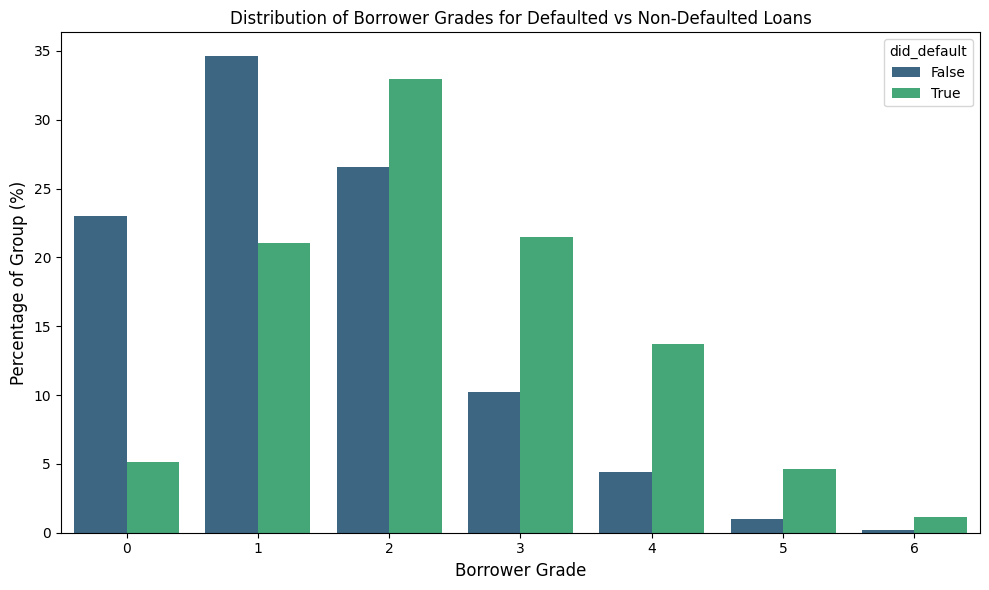

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

grade_dist = (
    cleaned_df.groupby("did_default")["grade"]
    .value_counts(normalize=True)
    .rename("percentage")
    .mul(100)
    .reset_index()
)

plt.figure(figsize=(10, 6))
plot = sns.barplot(
    data=grade_dist, x="grade", y="percentage", hue="did_default", palette="viridis"
)

plt.title("Distribution of Borrower Grades for Defaulted vs Non-Defaulted Loans")
plt.xlabel("Borrower Grade", fontsize=12)
plt.ylabel("Percentage of Group (%)", fontsize=12)

plt.tight_layout()
plt.show()

### Graph of Credit Score for Defaulted and Non-Defaulted Loans

Importantly, this is not every loan in the dataset. It is just saying of 10,000 loans that were either defaulted or not, which credit score band did those borrowers belong to?


In [14]:
import numpy as np

fico_bands = sorted([650, 690, 730, 770, 810, 850])

df_for_graphing = cleaned_df.copy()

indices = np.searchsorted(fico_bands, df_for_graphing["avg_fico"], side="right")

print(indices)

# df_for_graphing[:, "fico_band"] = fico_bands.index(df_for_graphing["avg_fico"])

# credit_score_dist = (
#     cleaned_df.groupby.value_counts(normalize=True)
#     .rename("percentage")
#     .mul(100)
#     .reset_index()
# )

# plt.figure(figsize=(10, 6))
# plot = sns.barplot(
#     data=grade_dist, x="grade", y="percentage", hue="did_default", palette="viridis"
# )

# plt.title("Distribution of Borrower Grades for Defaulted vs Non-Defaulted Loans")
# plt.xlabel("Borrower Grade", fontsize=12)
# plt.ylabel("Percentage of Group (%)", fontsize=12)

# plt.tight_layout()
# plt.show()

[1 2 2 ... 2 1 3]
